IMPORTS

In [3]:
import os
import polars as pl
import matplotlib.pyplot as plt

SETTING PATH

In [4]:
# Change working directory to your specific folder
os.chdir('/content/drive/MyDrive/YouTube_Semantic_Search_ML/Data Engineering')

READ DATA

In [5]:
df = pl.read_parquet('data/video-transcripts.parquet')

DATA SIZE

In [6]:
# shape + unique values
print("shape:", df.shape)
print("n unique rows:", df.n_unique())
for j in range(df.shape[1]):
    print("n unique elements (" + df.columns[j] + "):", df[:,j].n_unique())

shape: (106, 5)
n unique rows: 106
n unique elements (video_id): 106
n unique elements (datetime): 106
n unique elements (title): 106
n unique elements (description): 72
n unique elements (transcript): 103


In [8]:
print("Total number of title characters:", sum(len(df['title'][i]) for i in range(len(df))))
print("Total number of transcript characters:", sum(len(df['transcript'][i]) for i in range(len(df))))

Total number of title characters: 5559
Total number of transcript characters: 1176337


DTYPES

In [9]:
# change datetime to Datetime dtype
df = df.with_columns(pl.col('datetime').cast(pl.Datetime))
print(df.head())

shape: (5, 5)
┌─────────────┬──────────────┬───────────────────────┬──────────────────────┬──────────────────────┐
│ video_id    ┆ datetime     ┆ title                 ┆ description          ┆ transcript           │
│ ---         ┆ ---          ┆ ---                   ┆ ---                  ┆ ---                  │
│ str         ┆ datetime[μs] ┆ str                   ┆ str                  ┆ str                  │
╞═════════════╪══════════════╪═══════════════════════╪══════════════════════╪══════════════════════╡
│ 7Oy2NmPwJXo ┆ 2024-09-26   ┆ I Quit My Job… Here’s ┆ Here, I share all 9  ┆ 14 months ago I made │
│             ┆ 23:24:35     ┆ How Much…             ┆ ways I scr…          ┆ a big lif…           │
│ ZVVkdXHqEuM ┆ 2024-09-23   ┆ Knowledge             ┆                      ┆ knowledge            │
│             ┆ 15:45:12     ┆ Distillation Explain… ┆                      ┆ distillation         │
│             ┆              ┆                       ┆                      ┆

CHARACTER LENGTHS

(array([ 3.,  5., 16., 18., 14., 24., 14.,  9.,  1.,  2.]),
 array([16. , 23.8, 31.6, 39.4, 47.2, 55. , 62.8, 70.6, 78.4, 86.2, 94. ]),
 <BarContainer object of 10 artists>)

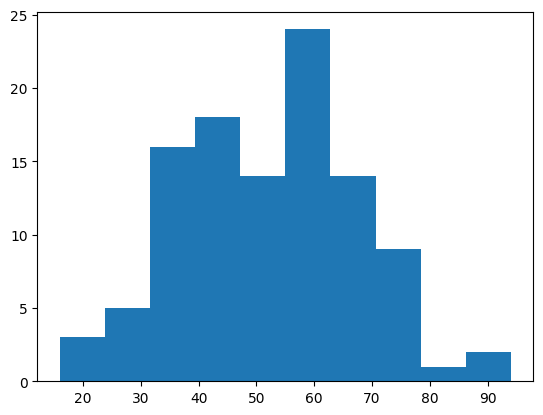

In [10]:
# lengths/character counts
plt.hist(df['title'].str.len_chars())

(array([41., 12., 20., 12., 10.,  5.,  2.,  1.,  2.,  1.]),
 array([3.00000e+00, 5.00610e+03, 1.00092e+04, 1.50123e+04, 2.00154e+04,
        2.50185e+04, 3.00216e+04, 3.50247e+04, 4.00278e+04, 4.50309e+04,
        5.00340e+04]),
 <BarContainer object of 10 artists>)

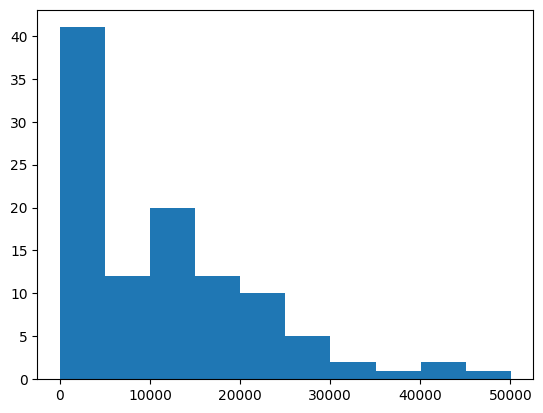

In [11]:
plt.hist(df['transcript'].str.len_chars())

HANDLING SPECIAL STRINGS

In [12]:
print(df['title'][3])
print(df['transcript'][3])

Python Explained in 60 Seconds #programming
here's python explained in 60 seconds python is a programming language in other words it's a way we can give precise instructions to computers the reason this is helpful is because we can use Python to automate almost any task this could be scraping websites analyzing data creating reports building chat Bots and so much more one of the reasons python has become so popular is because it is the go-to language for doing Ai and dat data science but it's also used in webdev finance game development and so many other places another upside of python is that it's a relatively highlevel programming language which means it's closer to English than the zeros and ones that computers understand this makes it easier for beginners to learn and use and now with tools like chat GPT everyone has access to a competent and patient coding tutor which makes it easier than ever to learn how to code


In [14]:
special_strings = ['&#39;', '&amp;', 'sha ']
special_string_replacements = ["'", "&", "Shaw "]

for i in range(len(special_strings)):
    df = df.with_columns(df['title'].str.replace(special_strings[i], special_string_replacements[i]).alias('title'))
    df = df.with_columns(df['transcript'].str.replace(special_strings[i], special_string_replacements[i]).alias('transcript'))

In [15]:
print(df['title'][3])
print(df['transcript'][3])

Python Explained in 60 Seconds #programming
here's python explained in 60 seconds python is a programming language in other words it's a way we can give precise instructions to computers the reason this is helpful is because we can use Python to automate almost any task this could be scraping websites analyzing data creating reports building chat Bots and so much more one of the reasons python has become so popular is because it is the go-to language for doing Ai and dat data science but it's also used in webdev finance game development and so many other places another upside of python is that it's a relatively highlevel programming language which means it's closer to English than the zeros and ones that computers understand this makes it easier for beginners to learn and use and now with tools like chat GPT everyone has access to a competent and patient coding tutor which makes it easier than ever to learn how to code


WRITE DATA

In [16]:
# write data to file
df.write_parquet('data/video-transcripts.parquet')
df.write_csv('data/video-transcripts.csv')